In [1]:
from google.colab import drive

drive.mount('/content/drive')
%cd /content/drive/MyDrive/Soft_Computing/Assignment-3
#%cd /content/drive/My Drive/Colab Notebooks/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Soft_Computing/Assignment-3


# Hyper-parameters

In [2]:
maxlen = 256
n_unique_words = 8192   # cut texts after this number of words

epochs = 16             # reduce to train the model faster at the cost of accuracy
batch_size = 128

num_layers = 64         # number of layers in LTSM

Read and parse dataset from file. Convert data to numpy.ndarray type. Shuffle data and allocate 60% of data for training, 20% for testing and 20% for validation.

In [4]:
from random import shuffle

import numpy as np
from keras.preprocessing import sequence

def read_data(file_name):
    with open(file_name, 'r', encoding = 'ISO-8859-1') as fp:
        data = [line.strip() for line in fp]
        return [(record[:-2], record[-1]) for record in data[1:]]

def convert(data):
    X, Y = [], []
    for record in data:
        X.append([ord(c) for c in record[0]])
        Y.append(int(record[1]))

    return np.array(X), np.array(Y)

dataset = read_data('Dataset1.csv')
shuffle(dataset)

len1 = int(0.6 * len(dataset))
len2 = int(0.8 * len(dataset))

train_data = dataset[:len1]
test_data = dataset[len1:len2]
validation_data = dataset[len2:]

x_train, y_train = convert(train_data)
x_test, y_test = convert(test_data)
x_validation, y_validation = convert(validation_data)

x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
x_validation = sequence.pad_sequences(x_validation, maxlen=maxlen)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


Train the model with a bidirectional RNN with multiple layers and the rectified linear unit activation function.

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional

model = Sequential()

model.add(Embedding(n_unique_words, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(num_layers)))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy']) 

history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=[x_test, y_test]
)

Epoch 1/16
49/49 [==============================] - 51s 956ms/step - loss: 0.1406 - accuracy: 0.0936 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/16
49/49 [==============================] - 46s 936ms/step - loss: 0.0593 - accuracy: 0.4308 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/16
49/49 [==============================] - 46s 945ms/step - loss: 0.0401 - accuracy: 0.5853 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/16
49/49 [==============================] - 47s 955ms/step - loss: 0.0294 - accuracy: 0.7123 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/16
49/49 [==============================] - 46s 944ms/step - loss: 0.0220 - accuracy: 0.7555 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/16
49/49 [==============================] - 47s 950ms/step - loss: 0.0171 - accuracy: 0.7590 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/16
49/49 [==============================] - 46s 944ms/step - loss: 0.0145 - accuracy: 

In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, RNN, SimpleRNN, LSTM, Bidirectional

model = Sequential()

model.add(Embedding(n_unique_words, 128, input_length=maxlen))
model.add(Bidirectional(SimpleRNN(num_layers, return_sequences=False)))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy']) 

history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=[x_test, y_test]
)

Epoch 1/16
49/49 [==============================] - 19s 358ms/step - loss: 0.1484 - accuracy: 0.2073 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/16
49/49 [==============================] - 17s 353ms/step - loss: 0.0872 - accuracy: 0.4926 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/16
49/49 [==============================] - 17s 350ms/step - loss: 0.0516 - accuracy: 0.6067 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/16
49/49 [==============================] - 17s 354ms/step - loss: 0.0379 - accuracy: 0.6904 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/16
49/49 [==============================] - 17s 354ms/step - loss: 0.0300 - accuracy: 0.7090 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/16
49/49 [==============================] - 17s 354ms/step - loss: 0.0433 - accuracy: 0.6778 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/16
49/49 [==============================] - 18s 358ms/step - loss: 0.0718 - accuracy: 

In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, RNN, SimpleRNN, LSTM, Bidirectional

model = Sequential()

model.add(Embedding(n_unique_words, 128, input_length=maxlen))
model.add(Bidirectional(SimpleRNN(num_layers, return_sequences=True)))
model.add(Bidirectional(SimpleRNN(32)))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy']) 

history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=[x_test, y_test]
)

Epoch 1/16
49/49 [==============================] - 77s 645ms/step - loss: 0.1759 - accuracy: 0.2508 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/16
49/49 [==============================] - 31s 638ms/step - loss: 0.1042 - accuracy: 0.4476 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 3/16
49/49 [==============================] - 31s 640ms/step - loss: 0.0817 - accuracy: 0.5711 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 4/16
49/49 [==============================] - 31s 638ms/step - loss: 0.0854 - accuracy: 0.5472 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 5/16
49/49 [==============================] - 31s 637ms/step - loss: 0.0755 - accuracy: 0.5761 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 6/16
49/49 [==============================] - 31s 642ms/step - loss: 0.0705 - accuracy: 0.5572 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 7/16
49/49 [==============================] - 31s 640ms/step - loss: 0.0586 - accuracy: 

# Plot graphs to show accuracy and loss over time

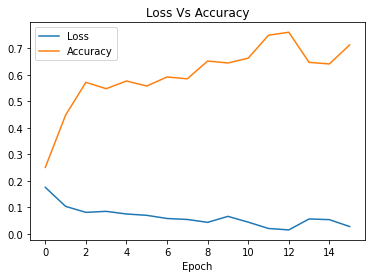

In [23]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('Loss Vs Accuracy')
pyplot.xlabel('Epoch')
pyplot.legend(['Loss', 'Accuracy'], loc='best')

pyplot.show() 

# Calculate the accuracy, precision, recall, f1 score and the confusion matrix

In [24]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix)

predictions = model.predict(x_validation)

classes = np.argmax(predictions, axis=1)
classes = list(map(int, map(bool, classes)))

accuracy = accuracy_score(y_validation, classes)
print('Accuracy: %f\n' % accuracy)

precision = precision_score(y_validation, classes)
print('Precision: %f\n' % precision)

recall = recall_score(y_validation, classes)
print('Recall: %f\n' % recall)

f1 = f1_score(y_validation, classes)
print('F1 score: %f\n' % f1)

matrix = confusion_matrix(y_validation, classes)
print('Confusion matrix: {}\n'.format(matrix.tolist()))

Accuracy: 0.881726

Precision: 0.746341

Recall: 0.686099

F1 score: 0.714953

Confusion matrix: [[1513, 104], [140, 306]]

